In [1]:
import requests
import io
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
from matplotlib import ticker
plt.rcParams['font.family'] = 'Arial Unicode MS'

/Users/hoover/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_readexcel = pd.read_excel('/Users/hoover/Documents/Github/TW Stock/TW_Stock_STprice.xlsx',index_col=0 ,sheet_name=None)
data = data_readexcel
data

{'20240102':           成交股數   成交筆數       成交金額     開盤價     最高價     最低價     收盤價  漲跌價差  \
 證券代號                                                                     
 0050   6283610  10013  848793104  135.60  135.95  134.65  134.90  0.55   
 0051     64969    313    4773744   73.65   73.80   73.20   73.45  0.20   
 0052    459461    487   59030788  129.40  129.40  127.95  128.45  0.95   
 0053     12197     21     868663   71.60   71.60   71.00   71.25  0.40   
 0055    299293    242    7218369   24.12   24.17   24.06   24.13  0.01   
 ...        ...    ...        ...     ...     ...     ...     ...   ...   
 9944    132686    150    2685810   20.20   20.30   20.20   20.25  0.05   
 9945  15196853   8077  590772910   37.95   39.35   37.80   39.25  1.50   
 9946    470703    251    9771854   20.40   21.00   20.35   21.00  0.60   
 9955    173540    222    4229761   24.65   24.65   24.20   24.30  0.10   
 9958   5235083   3954  925009116  176.50  180.50  173.50  173.50  1.00   
 
       最後揭示

In [3]:
stock = '3545'

In [4]:
q_shares = pd.DataFrame({a:b.loc[[stock],'成交股數'] for a,b in data.items()}).transpose()
open = pd.DataFrame({a:b.loc[[stock],'開盤價'] for a,b in data.items()}).transpose()
high = pd.DataFrame({a:b.loc[[stock],'最高價'] for a,b in data.items()}).transpose()
low = pd.DataFrame({a:b.loc[[stock],'最低價'] for a,b in data.items()}).transpose()
close = pd.DataFrame({a:b.loc[[stock],'收盤價'] for a,b in data.items()}).transpose()
df = pd.concat([q_shares, open, high, low, close], axis=1)
df.columns = ['成交股數', 'Open', 'High', 'Low', 'Close']
df["Return"]=df["Close"].pct_change()
df.head()

,成交股數,Open,High,Low,Close,Return
20240102,4053840,112.5,112.5,107.5,107.5,NaN
20240103,3267986,107.0,108.5,105.0,106.0,-0.013953
20240104,2166412,106.0,107.0,104.0,106.0,0.000000
20240105,2421434,106.0,108.5,105.5,106.5,0.004717
20240108,2063913,107.0,108.0,104.0,104.0,-0.023474


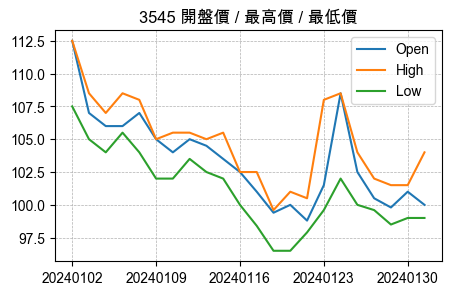

In [5]:
df[['Open', 'High', 'Low']].plot(figsize=(5,3))
plt.title(stock + ' 開盤價 / 最高價 / 最低價')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [6]:
df['Close_y'] = df["Close"].shift(1)
df['range -'] = round((df['Low'] - df['Open']) / df['Open'] * 100, 2)
df['range +'] = round((df['High'] - df['Open']) / df['Open'] * 100, 2)
df['range %'] = round((df['High'] - df['Low']) / df['Open'] * 100, 2)
df['range $'] = df['High'] - df['Low']
df.drop(df.index[0], inplace=True)
df

,成交股數,Open,High,Low,Close,Return,Close_y,range -,range +,range %,range $
20240103,3267986,107.0,108.5,105.0,106.0,-0.013953,107.5,-1.87,1.40,3.27,3.5
20240104,2166412,106.0,107.0,104.0,106.0,0.000000,106.0,-1.89,0.94,2.83,3.0
20240105,2421434,106.0,108.5,105.5,106.5,0.004717,106.0,-0.47,2.36,2.83,3.0
20240108,2063913,107.0,108.0,104.0,104.0,-0.023474,106.5,-2.80,0.93,3.74,4.0
20240109,2755185,105.0,105.0,102.0,103.5,-0.004808,104.0,-2.86,0.00,2.86,3.0
20240110,3032074,104.0,105.5,102.0,105.0,0.014493,103.5,-1.92,1.44,3.37,3.5
20240111,2085842,105.0,105.5,103.5,105.0,0.000000,105.0,-1.43,0.48,1.90,2.0
20240112,1695500,104.5,105.0,102.5,103.0,-0.019048,105.0,-1.91,0.48,2.39,2.5
20240115,2838970,103.5,105.5,102.0,102.5,-0.004854,103.0,-1.45,1.93,3.38,3.5
20240116,2684407,102.5,102.5,100.0,101.0,-0.014634,102.5,-2.44,0.00,2.44,2.5


In [7]:
# tick規則
def tick_rule(price):
    if price < 10:
        tick = 0.01
    elif price < 50:
        tick = 0.05
    elif price < 100:
        tick = 0.1
    elif price < 500:
        tick = 0.5
    elif price < 1000:
        tick = 1
    else:
        tick = 5
    return tick

In [8]:
# 價格換算百分比
# Round the percentage up/down to buy/sell to the nearest tick
def pct2tick(close_y, pct):
    target = close_y * (1 + pct/100)
    tick = tick_rule(target)
    price = round(round(target/tick) * tick, 2)
    return price

In [9]:
# Now the key is in percentage, and value is still the number of stock to buy/sell
test_strat2 = {2.5:1, 6:1, 9:2, -2.5:1, -6:1, -9:2}
test_strat2

{2.5: 1, 6: 1, 9: 2, -2.5: 1, -6: 1, -9: 2}

In [10]:
# 把絕對數值改成比例
def criteria(close_y, hold, fee_rate, tax_rate, up, down, buy_, sell_, bal, fee_, tax_, dic_criteria):

    new_dict = {}
    for key, value in dic_criteria.items():
        newkey = pct2tick(close_y, key)
        new_dict[newkey - close_y] = value

    for key, value in new_dict.items():
        if key < 0:                                                 #key為負數
            if down >= -key:                                        #跌2.5塊，買1張
                buy_ += value
                hold += value
                fee_ += value * (close_y + key) * 1000 * fee_rate
                bal -= value * (close_y + key) * 1000               #花費$(close_y+key)買1張=1000股
                #print('down', 'buy '+str(buy_)+'at $'+str(close_y + key), ',hold '+str(hold), ',bal '+str(bal), ',fee '+str(fee_))
        if key > 0:                                                 #key為正數
            if up >= key:                                           #漲2.5塊，賣1張
                sell_ += min(hold, value)
                fee_ += min(hold, value) * (close_y + key) * 1000 * fee_rate
                tax_ += min(hold, value) * (close_y + key) * 1000 * tax_rate
                bal += min(hold, value) * (close_y + key) * 1000    #$(close_y+2.5)賣1張=1000股
                hold -= min(hold, 1)
                #print('up,', 'sell '+str(sell_)+'at $'+str(close_y + key), ',hold '+str(hold), ',bal '+str(bal), ',fee '+str(fee_))

    return hold, buy_, sell_, bal, fee_, tax_

In [11]:
def strat04(data, init_holding, init_balance, fee_discount, strat):
    df = data
    # 初始持有證券價值
    init_value = init_holding * df.iloc[0,:]['Close'] * 1000
    # 初始持有張數
    holding = [init_holding]
    # 初始資金
    balance = [init_balance]
    # 交易手續費(買、賣價各0.1425%)
    fee_rate = 0.001425 * fee_discount
    # 證交稅(賣出價格0.3%)
    tax_rate = 0.003

    buy, sell, profit, fee, tax, expense, close_value, balance_total  = [], [], [], [], [], [], [], []
    cum_transaction = [0]
    cum_expense = [0]

    for date in df.index:
        #一些變數設置
        hold = holding[-1]
        bal = balance[-1]
        buy_, sell_, fee_, tax_, exp_ = [0, 0, 0, 0, 0]
        high = df.loc[date, 'High']
        close_y = df.loc[date, 'Close_y']
        low = df.loc[date, 'Low']
        up =  high - close_y
        down = close_y - low

        # 執行分析
        analysis = criteria(close_y, hold, fee_rate, tax_rate, up, down, buy_, sell_, bal, fee_, tax_, strat)
        hold, buy_, sell_, bal, fee_, tax_ = analysis[0:6]

        close_val = df.loc[date, 'Close'] * hold * 1000         #計算當日持有股票價值
        trans = buy_ + sell_                                    #計算當日交易量
        exp_ = fee_ + tax_
        bal -= exp_
        bal_tot = bal + close_val
        prof = bal_tot - init_balance - init_value              #計算累積利潤

        # 數據回填
        holding.append(hold)
        balance.append(bal)
        buy.append(buy_)
        sell.append(sell_)
        cum_transaction.append(cum_transaction[-1]+trans)
        close_value.append(close_val)
        fee.append(fee_)
        tax.append(tax_)
        expense.append(exp_)
        cum_expense.append(cum_expense[-1]+exp_)
        balance_total.append(bal_tot)
        profit.append(prof)
        

    holding = holding[1:]
    balance = balance[1:]
    cum_transaction = cum_transaction[1:]
    cum_expense = cum_expense[1:]

    output = pd.DataFrame(data={'持有股數':holding, '買入':buy, '賣出':sell, '累計交易量': cum_transaction, '收盤價':df['Close'], 
                              '交易手續費': fee, '證交稅': tax, '當日交易成本': expense, '累計交易成本': cum_expense, 
                              '帳戶餘額':balance, '持股收盤價值': close_value, '帳戶總值':balance_total, '帳戶盈虧': profit}, index=df.index)
    output['Index Daily Return (%)'] = df['Return'] * 100
    output['Strategy Daily Return (%)'] = output['帳戶總值'].pct_change() * 100
    output.loc[data.index[0], 'Strategy Daily Return (%)'] = (output.loc[data.index[0], '帳戶總值'] / (init_balance + init_value) - 1) * 100
    output['Index Total Return (%)'] = ((1 + output['Index Daily Return (%)']/100).cumprod() - 1) * 100
    output['Strategy Total Return (%)'] = ((1 + output['Strategy Daily Return (%)']/100).cumprod() - 1) * 100

    return output

In [12]:
strategy04 = strat04(df, 3, 500000, 0.4, test_strat2)
strategy04

,持有股數,買入,賣出,累計交易量,收盤價,交易手續費,證交稅,當日交易成本,累計交易成本,帳戶餘額,持股收盤價值,帳戶總值,帳戶盈虧,Index Daily Return (%),Strategy Daily Return (%),Index Total Return (%),Strategy Total Return (%)
20240103,4,1,0,1,106.0,59.850,0.0,59.850,59.850,394940.150,424000.0,818940.150,940.150,-1.395349,0.114933,-1.395349,0.114933
20240104,4,0,0,1,106.0,0.000,0.0,0.000,59.850,394940.150,424000.0,818940.150,940.150,0.000000,0.000000,-1.395349,0.114933
20240105,3,0,1,2,106.5,61.845,325.5,387.345,447.195,503052.805,319500.0,822552.805,4552.805,0.471698,0.441138,-0.930233,0.556578
20240108,4,1,0,3,104.0,59.280,0.0,59.280,506.475,398993.525,416000.0,814993.525,-3006.475,-2.347418,-0.919002,-3.255814,-0.367540
20240109,4,0,0,3,103.5,0.000,0.0,0.000,506.475,398993.525,414000.0,812993.525,-5006.475,-0.480769,-0.245401,-3.720930,-0.612039
20240110,4,0,0,3,105.0,0.000,0.0,0.000,506.475,398993.525,420000.0,818993.525,993.525,1.449275,0.738013,-2.325581,0.121458
20240111,4,0,0,3,105.0,0.000,0.0,0.000,506.475,398993.525,420000.0,818993.525,993.525,0.000000,0.000000,-2.325581,0.121458
20240112,5,1,0,4,103.0,58.425,0.0,58.425,564.900,296435.100,515000.0,811435.100,-6564.900,-1.904762,-0.922892,-4.186047,-0.802555
20240115,4,0,1,5,102.5,60.135,316.5,376.635,941.535,401558.465,410000.0,811558.465,-6441.535,-0.485437,0.015203,-4.651163,-0.787474
20240116,4,0,0,5,101.0,0.000,0.0,0.000,941.535,401558.465,404000.0,805558.465,-12441.535,-1.463415,-0.739318,-6.046512,-1.520970


/var/folders/dt/b_7_94pn6bqd3dbrpt95_nn80000gn/T/ipykernel_40820/2153613891.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(df.index, rotation=60)
/var/folders/dt/b_7_94pn6bqd3dbrpt95_nn80000gn/T/ipykernel_40820/2153613891.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(strategy04.index, rotation=60)
/var/folders/dt/b_7_94pn6bqd3dbrpt95_nn80000gn/T/ipykernel_40820/2153613891.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(strategy04.index, rotation=60)
/var/folders/dt/b_7_94pn6bqd3dbrpt95_nn80000gn/T/ipykernel_40820/2153613891.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(strategy04.index, rotation=60)


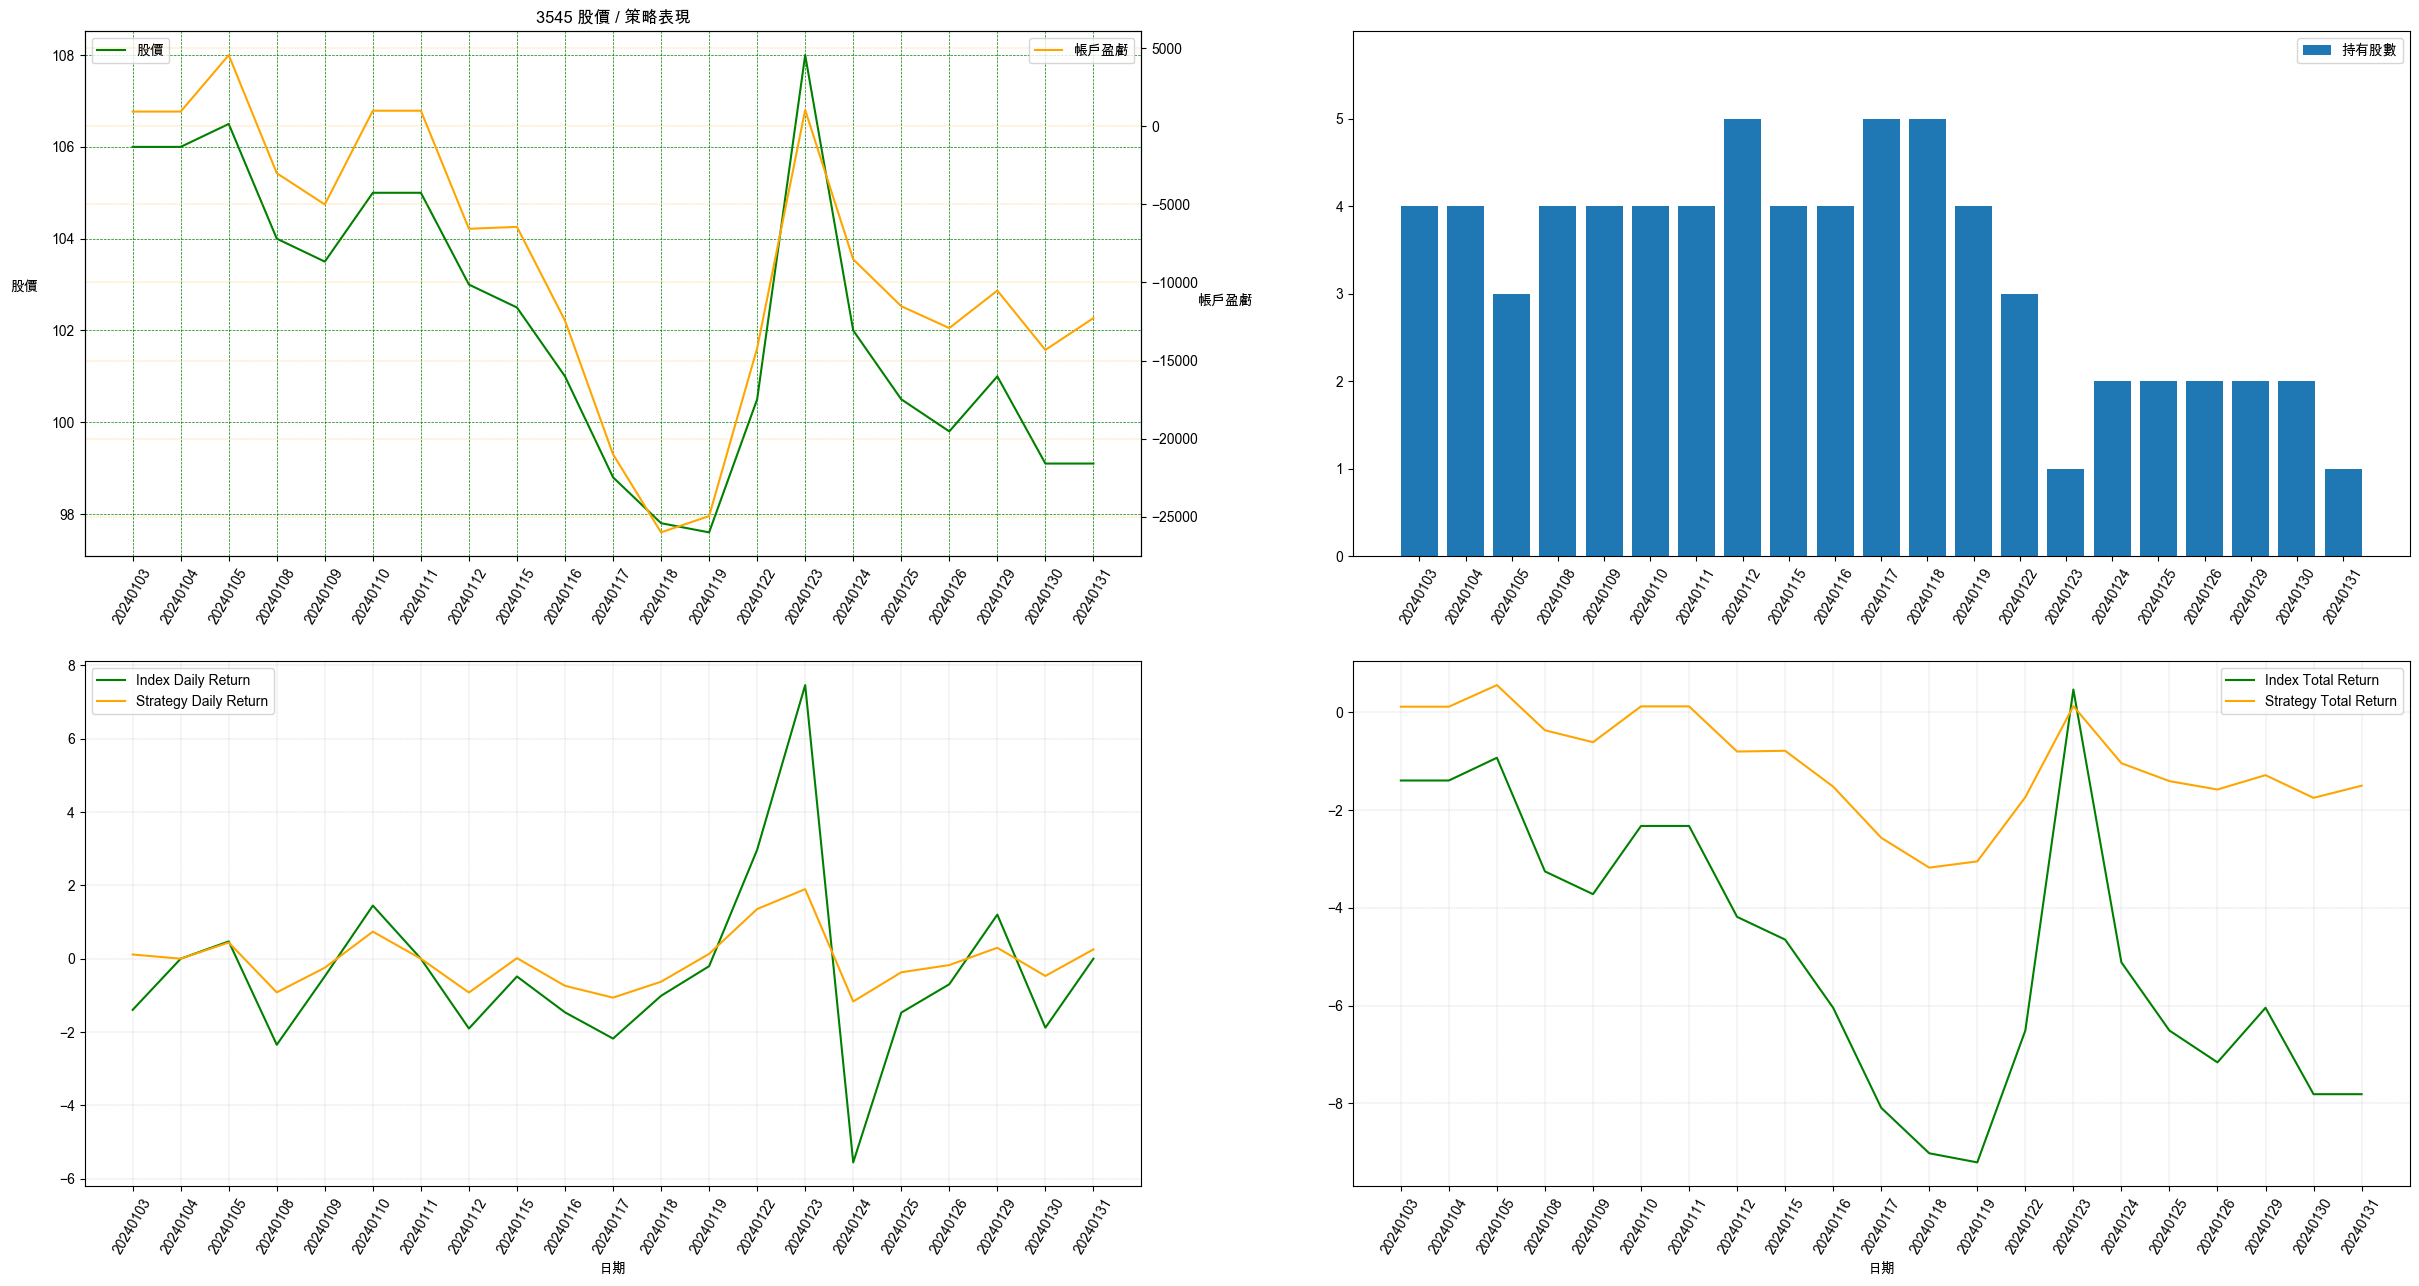

In [13]:
# 多張圖合併
fig, ax = plt.subplots(2, 2, figsize=(30,15), sharex=False)
ax[0,0].plot(df['Close'], color='green')
ax[0,0].set_title(stock+' 股價 / 策略表現')
#ax.set_xlabel('日期')
ax[0,0].set_xticklabels(df.index, rotation=60)
ax[0,0].set_ylabel('股價', rotation=0, labelpad=20)
ax[0,0].grid(color='green', linestyle='--', linewidth=0.5)
ax[0,0].legend(['股價'], loc=2)

ax2 = ax[0,0].twinx()
ax2.plot(strategy04['帳戶盈虧'], color='orange')
ax2.set_ylabel('帳戶盈虧', rotation=0, labelpad=20)
ax2.grid(color='orange', linestyle='--', linewidth=0.25)
ax2.legend(['帳戶盈虧'] ,loc=1)

ax[0,1].bar(x=strategy04.index, height=strategy04['持有股數'])
#ax[0,1].set_xlabel('日期')
ax[0,1].set_xticklabels(strategy04.index, rotation=60)
ax[0,1].set_yticks(range(0, max(strategy04['持有股數']+1)))
ax[0,1].legend(['持有股數'])
y_min = min([x for x in strategy04['持有股數'] if x != 0]) - 1
y_max = max(strategy04['持有股數']) + 1
ax[0,1].set_ylim(y_min, y_max)

ax[1,0].plot(strategy04['Index Daily Return (%)'], color='green')
ax[1,0].plot(strategy04['Strategy Daily Return (%)'], color='orange')
ax[1,0].set_xticklabels(strategy04.index, rotation=60)
ax[1,0].legend(['Index Daily Return', 'Strategy Daily Return'], loc=2)
ax[1,0].grid(linestyle='--', linewidth=0.25)
ax[1,0].set_xlabel('日期')

ax[1,1].plot(strategy04['Index Total Return (%)'], color='green')
ax[1,1].plot(strategy04['Strategy Total Return (%)'], color='orange')
ax[1,1].set_xticklabels(strategy04.index, rotation=60)
ax[1,1].legend(['Index Total Return', 'Strategy Total Return'])
ax[1,1].grid(linestyle='--', linewidth=0.25)
ax[1,1].set_xlabel('日期')

# 調整圖片之間距離
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()